# Problem 5: Russian plate detection using HaarCascade method

Using OpenCV's Viola-Jones (Haar cascade) detector with `haarcascade_russian_plate_number.xml`.


In [16]:
import cv2
import matplotlib.pyplot as plt
import os

In [17]:
image_path = os.path.join("imgs", "rus_plate.jpg")
cascade_path = "haarcascade_russian_plate_number.xml"
output_path = os.path.join("output", "asn4_p4_rus_plate_detected.jpg")

img = cv2.imread(str(image_path))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

detector = cv2.CascadeClassifier(str(cascade_path))

plates = detector.detectMultiScale(
    gray,
    scaleFactor=1.05,
    minNeighbors=8,
    minSize=(450, 130),
)

plates = sorted(plates, key=lambda r: (r[1], r[0]))

print("Detected Russian number plates:", len(plates))

for (x, y, w, h) in plates:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)

Detected Russian number plates: 4


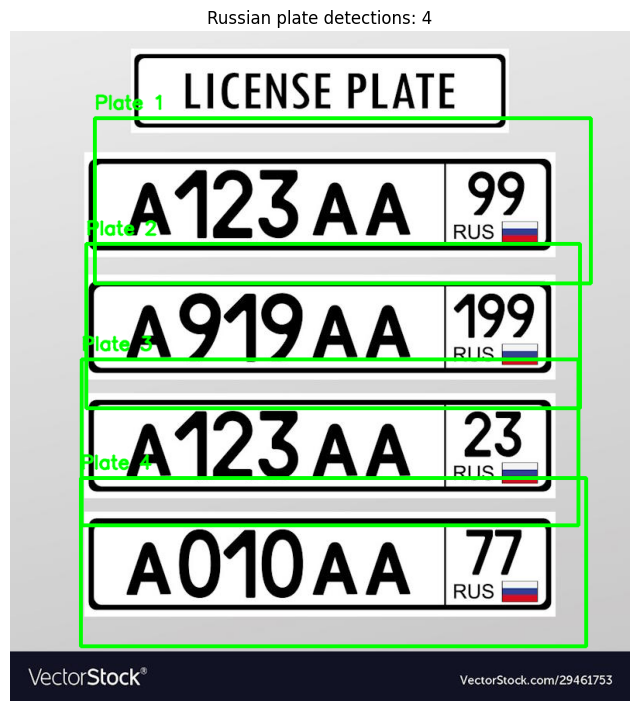

Saved annotated result to: output/asn4_p4_rus_plate_detected.jpg


In [18]:
annotated = img.copy()
for i, (x, y, w, h) in enumerate(plates, start=1):
    cv2.rectangle(annotated, (x, y), (x + w, y + h), (0, 255, 0), 4)
    cv2.putText(annotated, f'Plate {i}', (x, max(30, y - 12)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)


cv2.imwrite(str(output_path), annotated)

plt.figure(figsize=(8, 9))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title(f'Russian plate detections: {len(plates)}')
plt.axis('off')
plt.show()

print(f'Saved annotated result to: {output_path}')
